In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

In [21]:
#RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('Negative MSE scores:', np.round(neg_mse_scores, 2))
print('RMSE scores:', np.round(rmse_scores, 2))
print('평균 RMSE:', np.round(avg_rmse, 2))

Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
RMSE scores: [2.81 3.63 4.54 6.8  4.34]
평균 RMSE: 4.42


## 다양한 유형의 회귀트리 생성

In [5]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(model.__class__.__name__)
    print('평균 RMSE:', np.round(avg_rmse, 2))

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
gb_reg = GradientBoostingRegressor(n_estimators=1000, random_state=0)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

DecisionTreeRegressor
평균 RMSE: 5.98
RandomForestRegressor
평균 RMSE: 4.42
GradientBoostingRegressor
평균 RMSE: 4.27
XGBRegressor
평균 RMSE: 4.25
LGBMRegressor
평균 RMSE: 4.65


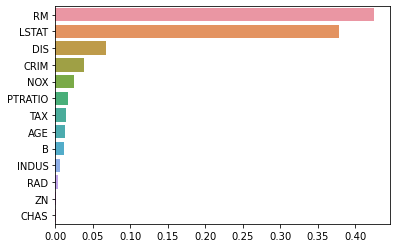

In [15]:
#회귀트리는 선형회귀와 다른 처리방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다.
#대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x = feature_series, y = feature_series.index);

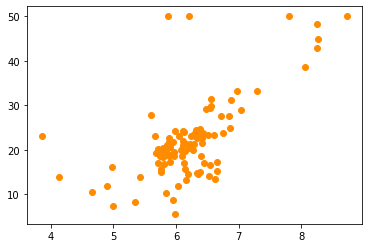

In [17]:
boston_df_sample = boston_df[['RM', 'PRICE']]
boston_df_sample = boston_df_sample.sample(n = 100, random_state=0)
plt.figure()
plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange');

In [22]:
#LinearRegression과 DecisionTreeRegressor(max_depth=2,7) 학습
import numpy as np
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = boston_df_sample['RM'].values.reshape(-1, 1)
y_target = boston_df_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

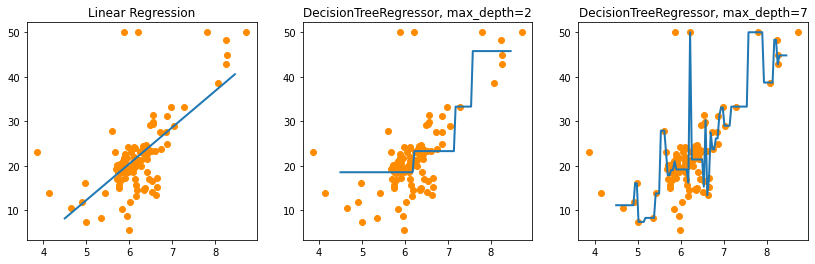

In [25]:
#학습된 Regressor에서 예측한 Price 회귀선
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2);

ax2.set_title('DecisionTreeRegressor, max_depth=2')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label=' max_depth=2', linewidth=2);

ax3.set_title('DecisionTreeRegressor, max_depth=7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label=' max_depth=7', linewidth=2);

In [ ]:
#선형회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 
#회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다.
#DecisionTreeRegressor의 max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하여 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.